In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = [
['Artificial Intelligence Engineering', 'Problem Çözme, Ekip Çalışması, Öğrenmeye Açıklık, Programlama, Analiz, Yaratıcılık, Proje Yönetimi, Analitik Düşünme', '0'],
['3D Production Engineering', 'Problem Çözme, Müşteri Odaklılık, Ekip Çalışması, İletişim Becerisi, Öğrenmeye Açıklık, Programlama, Çizim Yeteneği, Analitik Düşünme, Tasarım Becerisi, Proje Yönetimi', '0'],
['Mobile Application Developer', 'Problem Çözme, İletişim Becerisi, Ekip Çalışması, Öğrenmeye Açıklık, Programlama, Yaratıcılık, Proje Yönetimi, Analitik Düşünme', '2'],
['Game Developer', 'Problem Çözme, İletişim Becerisi, Ekip Çalışması, Programlama, Yaratıcılık, Analitik Düşünme', '2'],
['Blockchain Developer', 'Problem Çözme, Ekip Çalışması, Programlama, Kriptografi Bilgisi, Analiz, Öğrenmeye Açıklık, Analitik Düşünme', '2'],
['Software Engineering', 'Problem Çözme, Programlama, Analitik Düşünme, Öğrenmeye Açıklık, İletişim Becerisi', '2'],
['AR/VR Developer', 'Ekip Çalışması, Programlama, İnovasyon, Problem Çözme, Yaratıcılık, Öğrenmeye Açıklık, Tasarım Becerisi, Analitik Düşünme', '0'],
['Cyber Security Specialist', 'Problem Çözme, Ekip Çalışması, İletişim Becerisi, Programlama, Liderlik, Analiz, Analitik Düşünme, Tasarım Becerisi', '0'],
['Content Creator', 'İletişim Becerisi, Ekip Çalışması, Programlama, Analiz, Yaratıcılık, Öğrenmeye Açıklık, Tasarım Becerisi, Analitik Düşünme', '0'],
['Psychiatrist', 'Problem Çözme, İletişim Becerisi, Empati Yeteneği, Analiz, Öğrenmeye Açıklık, Analitik Düşünme', '0'],
['Robotics Engineering', 'Problem Çözme, Ekip Çalışması, İnovasyon, Programlama, Analitik Düşünme', '2'],
['Digital Marketing Expertise', 'Raporlama, Problem Çözme, Proje Yönetimi, Müşteri Odaklılık, Ekip Çalışması, İletişim Becerisi, Analiz, Satış Becerisi, Yaratıcılık, Analitik Düşünme', '2'],
['Data Scientist', 'Raporlama, Problem Çözme, Ekip Çalışması, İnovasyon, Programlama, Liderlik, Analiz, Analitik Düşünme', '2'],
['Cloud Engineering', 'Problem Çözme, Ekip Çalışması, Programlama, Analiz, Öğrenmeye Açıklık, Analitik Düşünme', '2'],
['Dietetics', 'Problem Çözme, Ekip Çalışması, İletişim Becerisi, Empati Yeteneği, Analiz, Analitik Düşünme', '4'],
['Database Specialist', 'Analiz, Programlama, Problem Çözme, Analitik Düşünme', '5'],
['Epidemiologists', 'İnovasyon, Veri Toplama ve Kullanma, Analiz, Araştırma Becerisi, Analitik Düşünme', '2'],
['Statisticians', 'Raporlama, Öğrenmeye Açıklık, Problem Çözme, Programlama, Analiz, Analitik Düşünme', '4'],
['Graphic Designer', 'Zaman Yönetimi, Tasarım Becerisi, Yaratıcılık, Öğrenmeye Açıklık', '2'],
['Food Technician', 'Analiz, Ekip Çalışması, Analitik Düşünme', '2'],
['Hydrologist', 'Analiz, Araştırma Becerisi, Öğrenmeye Açıklık, Raporlama', '4'],
['User Experience Specialist', 'Problem Çözme, Yaratıcı Düşünme, Empati, Analiz, Yaratıcılık, Tasarım Becerisi', '4'],
]

In [3]:
veriSeti = pd.DataFrame(data, columns=['Meslek', 'Yetkinlik', 'Minimum Beklenilen Deneyim(YIL)'])

In [4]:
veriSeti.to_csv('veriSeti.csv', index=False)

# Veri Analizi - Meslekler ve Yetkinlikler

In [5]:
#tablo verilerini pandas ile çağırma
dataset=pd.read_csv("veriSeti.csv")

In [6]:
dataset

,Meslek,Yetkinlik,Minimum Beklenilen Deneyim(YIL)
0,Artificial Intelligence Engineering,"Problem Çözme, Ekip Çalışması, Öğrenmeye Açıkl...",0
1,3D Production Engineering,"Problem Çözme, Müşteri Odaklılık, Ekip Çalışma...",0
2,Mobile Application Developer,"Problem Çözme, İletişim Becerisi, Ekip Çalışma...",2
3,Game Developer,"Problem Çözme, İletişim Becerisi, Ekip Çalışma...",2
4,Blockchain Developer,"Problem Çözme, Ekip Çalışması, Programlama, Kr...",2
5,Software Engineering,"Problem Çözme, Programlama, Analitik Düşünme, ...",2
6,AR/VR Developer,"Ekip Çalışması, Programlama, İnovasyon, Proble...",0
7,Cyber Security Specialist,"Problem Çözme, Ekip Çalışması, İletişim Beceri...",0
8,Content Creator,"İletişim Becerisi, Ekip Çalışması, Programlama...",0
9,Psychiatrist,"Problem Çözme, İletişim Becerisi, Empati Yeten...",0


In [7]:
#satır ve sutün sayısına bakma
dataset.shape

(22, 3)

In [8]:
# en baştan çalıştırmazsak hata veriyor!!!
dataset=pd.read_csv("veriSeti.csv") # veri setini burada çağırınca çalışıyor 

yetkinlik = 'Programlama'  # İlgilenilen yetkinlik
meslekler = []  # Yetkinliğin geçtiği meslekleri tutacak liste

# Veri setini dolaşarak yetkinliğin geçtiği meslekleri bulma
for meslek in data:
    yetkinlikler = meslek[1].split(', ')  # Mesleğin yetkinliklerini ayırma
    if yetkinlik in yetkinlikler:
        meslekler.append(meslek[0])  # Mesleği listeye ekleme

# Sonucu yazdırma
print(f"'{yetkinlik}' yetkinliği {len(meslekler)} meslekte bulunmaktadır.")
print()
print("Bu meslekler şunlardır:")
for meslek in meslekler:
    print("*", meslek)


'Programlama' yetkinliği 14 meslekte bulunmaktadır.

Bu meslekler şunlardır:
* Artificial Intelligence Engineering
* 3D Production Engineering
* Mobile Application Developer
* Game Developer
* Blockchain Developer
* Software Engineering
* AR/VR Developer
* Cyber Security Specialist
* Content Creator
* Robotics Engineering
* Data Scientist
* Cloud Engineering
* Database Specialist
* Statisticians


In [9]:
veriSeti = pd.read_csv('veriSeti.csv')

# Tüm yetkinlikleri birleştirme
yetkinlikler = []
for meslek in veriSeti.values:
    yetkinlikler.extend(meslek[1].split(", "))

# Frekans tablosu oluşturma, frekansa bakma 
frekanslar = pd.Series(yetkinlikler).value_counts().reset_index()
frekanslar.columns = ['Yetkinlik', 'Meslek Sayısı']

print(frekanslar)


                   Yetkinlik  Meslek Sayısı
0           Analitik Düşünme             19
1              Problem Çözme             17
2                     Analiz             15
3                Programlama             14
4             Ekip Çalışması             14
5          Öğrenmeye Açıklık             12
6          İletişim Becerisi              9
7                Yaratıcılık              8
8           Tasarım Becerisi              6
9             Proje Yönetimi              4
10                 İnovasyon              4
11                 Raporlama              4
12         Müşteri Odaklılık              2
13                  Liderlik              2
14           Empati Yeteneği              2
15        Araştırma Becerisi              2
16            Çizim Yeteneği              1
17       Kriptografi Bilgisi              1
18            Satış Becerisi              1
19  Veri Toplama ve Kullanma              1
20            Zaman Yönetimi              1
21          Yaratıcı Düşünme    

# Görselleştirme - Grafikler

In [10]:
# en baştan çalıştırmazsak hata veriyor!!!
dataset=pd.read_csv("veriSeti.csv") # veri setini burada çağırınca çalışıyor 

meslek = 'Data Scientist'  # İlgilenilen meslek
meslek_verisi = veriSeti.loc[veriSeti['Meslek'] == meslek]

if not meslek_verisi.empty:
    yetkinlikler = meslek_verisi['Yetkinlik'].iloc[0].split(', ')
    print(f"{meslek} Mesleğinin Yetkinlikleri:")
    for yetkinlik in yetkinlikler:
        print("*", yetkinlik)
else:
    print(f"{meslek} Mesleği bulunamadı.")


Data Scientist Mesleğinin Yetkinlikleri:
* Raporlama
* Problem Çözme
* Ekip Çalışması
* İnovasyon
* Programlama
* Liderlik
* Analiz
* Analitik Düşünme


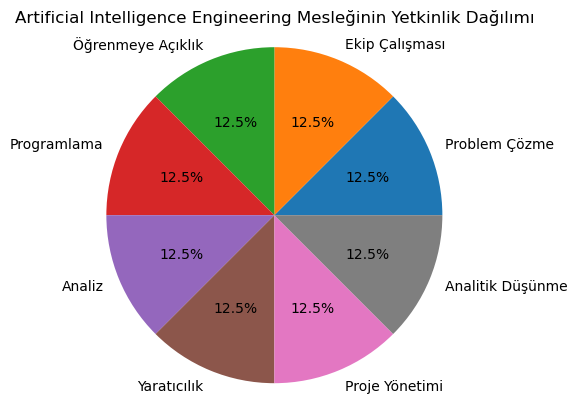

In [11]:
import matplotlib.pyplot as plt

meslek = 'Artificial Intelligence Engineering'  # İlgilenilen meslek

# Meslek verisini arama
meslek_verisi = next((veri for veri in data if veri[0] == meslek), None)

if meslek_verisi:
    yetkinlikler = meslek_verisi[1].split(', ')

    # Pasta grafiği oluşturma
    plt.pie([1] * len(yetkinlikler), labels=yetkinlikler, autopct='%1.1f%%')
    plt.title(f"{meslek} Mesleğinin Yetkinlik Dağılımı")
    plt.axis('equal')
    plt.show()
else:
    print(f"{meslek} Mesleği bulunamadı.")


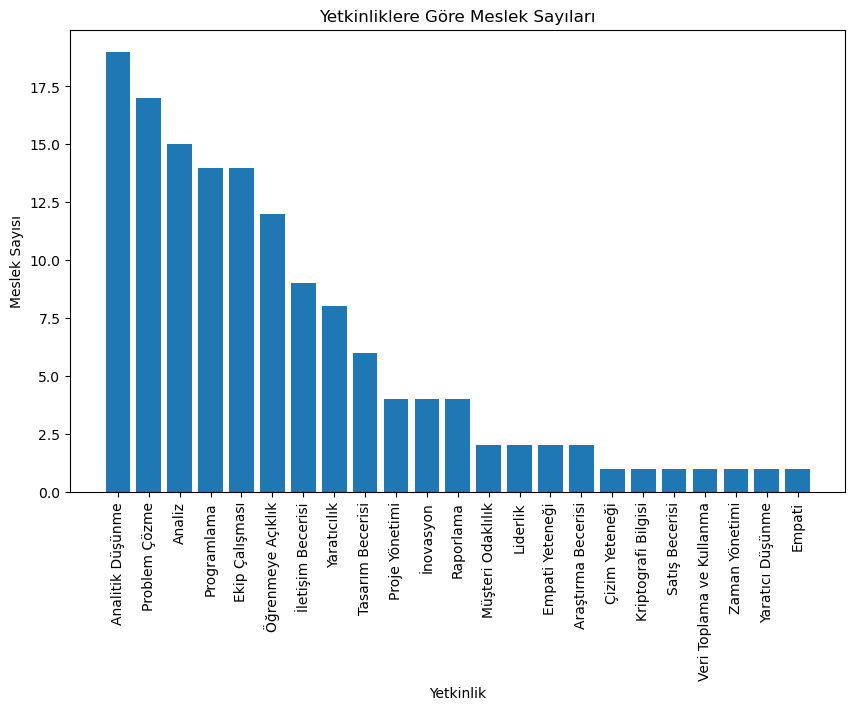

In [12]:
veriSeti = pd.read_csv('veriSeti.csv')

# Tüm yetkinlikleri birleştirme
yetkinlikler = []
for meslek in veriSeti.values:
    yetkinlikler.extend(meslek[1].split(", "))

# Frekans tablosu oluşturma
frekanslar = pd.Series(yetkinlikler).value_counts().reset_index()
frekanslar.columns = ['Yetkinlik', 'Meslek Sayısı']

# Sütun grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.bar(frekanslar['Yetkinlik'], frekanslar['Meslek Sayısı'])
plt.xlabel('Yetkinlik')
plt.ylabel('Meslek Sayısı')
plt.title('Yetkinliklere Göre Meslek Sayıları')
plt.xticks(rotation=90)
plt.show()



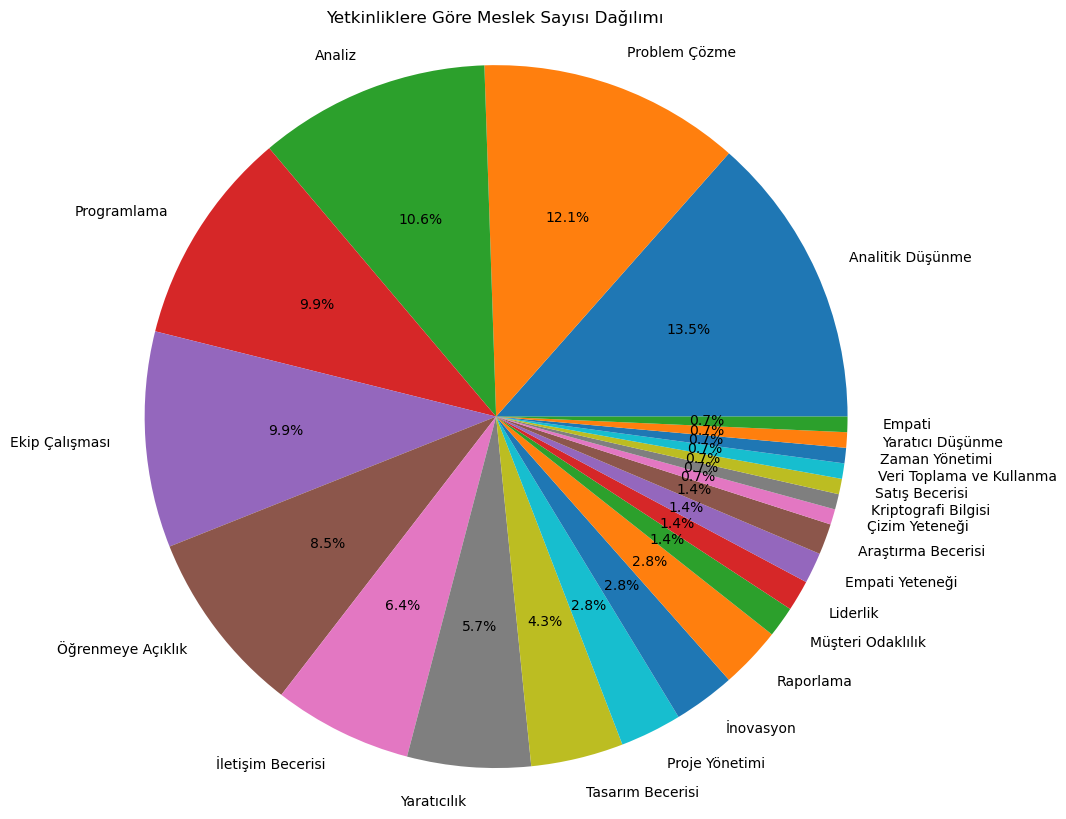

In [13]:
veriSeti = pd.read_csv('veriSeti.csv')

# Tüm yetkinlikleri birleştirme
yetkinlikler = []
for meslek in veriSeti.values:
    yetkinlikler.extend(meslek[1].split(", "))

# Frekans tablosu oluşturma
frekanslar = pd.Series(yetkinlikler).value_counts().reset_index()
frekanslar.columns = ['Yetkinlik', 'Meslek Sayısı']

# Pasta grafiği oluşturma
plt.figure(figsize=(10, 10))
plt.pie(frekanslar['Meslek Sayısı'], labels=frekanslar['Yetkinlik'], autopct='%1.1f%%')
plt.title('Yetkinliklere Göre Meslek Sayısı Dağılımı')
plt.axis('equal')
plt.show()


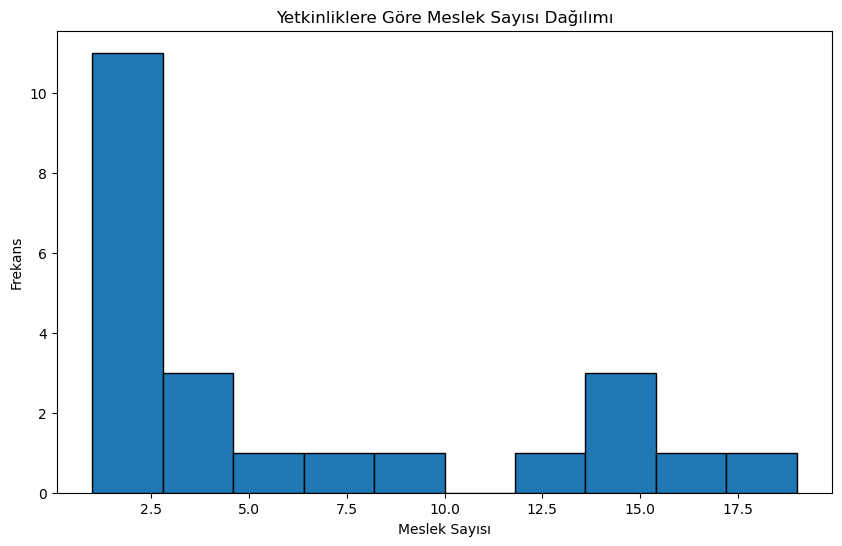

In [14]:
veriSeti = pd.read_csv('veriSeti.csv')

# Tüm yetkinlikleri birleştirme
yetkinlikler = []
for meslek in veriSeti.values:
    yetkinlikler.extend(meslek[1].split(", "))

# Frekans tablosu oluşturma
frekanslar = pd.Series(yetkinlikler).value_counts().reset_index()
frekanslar.columns = ['Yetkinlik', 'Meslek Sayısı']

# Histogram grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.hist(frekanslar['Meslek Sayısı'], bins=10, edgecolor='black')
plt.xlabel('Meslek Sayısı')
plt.ylabel('Frekans')
plt.title('Yetkinliklere Göre Meslek Sayısı Dağılımı')
plt.show()


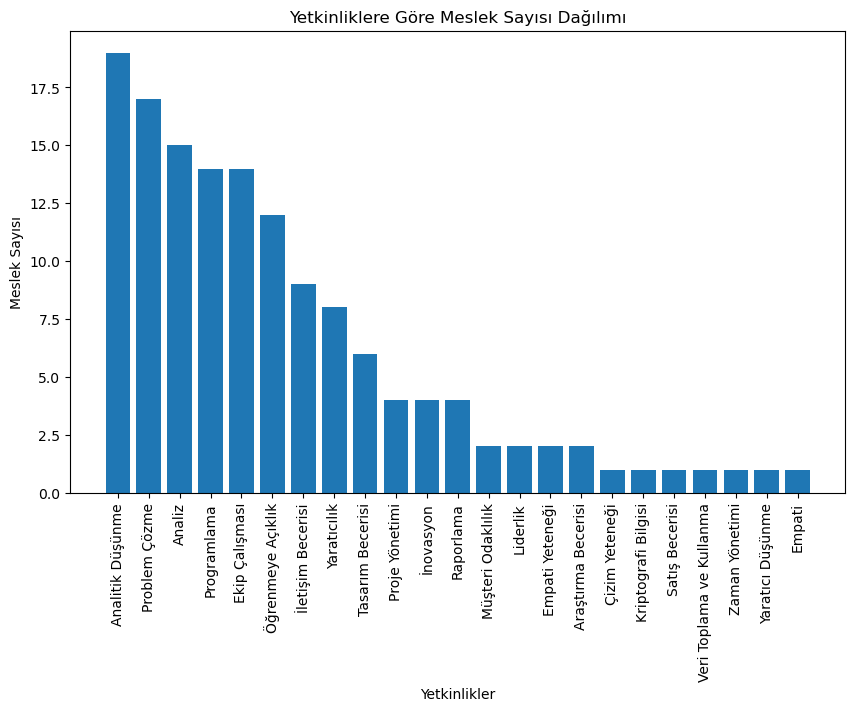

In [15]:
veriSeti = pd.read_csv('veriSeti.csv')

# Tüm yetkinlikleri birleştirme
yetkinlikler = []
for meslek in veriSeti.values:
    yetkinlikler.extend(meslek[1].split(", "))

# Frekans tablosu oluşturma
frekanslar = pd.Series(yetkinlikler).value_counts().reset_index()
frekanslar.columns = ['Yetkinlik', 'Meslek Sayısı']

# Dağılım grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.bar(frekanslar['Yetkinlik'], frekanslar['Meslek Sayısı'])
plt.xlabel('Yetkinlikler')
plt.ylabel('Meslek Sayısı')
plt.title('Yetkinliklere Göre Meslek Sayısı Dağılımı')
plt.xticks(rotation=90)
plt.show()


# Algoritma Seçimi

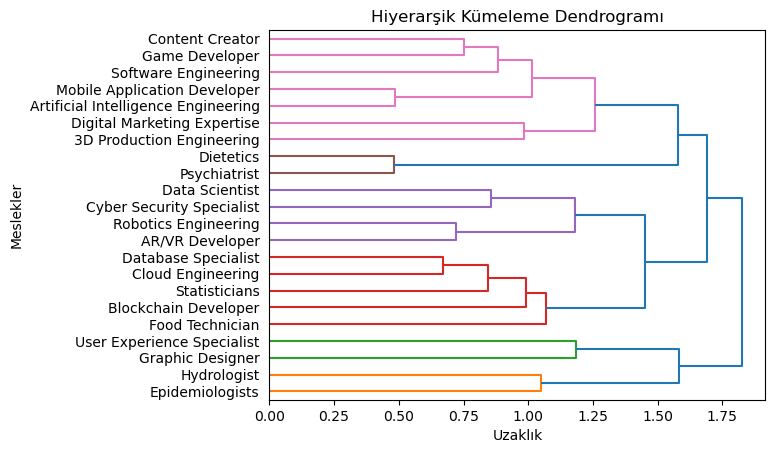

In [16]:
# Veri setini DataFrame'e dönüştürme
veriSeti = pd.read_csv('veriSeti.csv')

# Sadece 'Meslek' ve 'Yetkinlik' sütunlarını seçme!
data = veriSeti[['Meslek', 'Yetkinlik']]

# Yetkinlikleri vektörlere dönüştürme
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(data['Yetkinlik'].values.astype('U'))

# Hiyerarşik kümeleme işlemi
linkage_matrix = linkage(X.toarray(), method='ward')

# Dendrogramı oluşturma
dendrogram(linkage_matrix, labels=data['Meslek'].values, orientation='right')

# Dendrogramı görselleştirme
plt.xlabel('Uzaklık')
plt.ylabel('Meslekler')
plt.title('Hiyerarşik Kümeleme Dendrogramı')
plt.show()


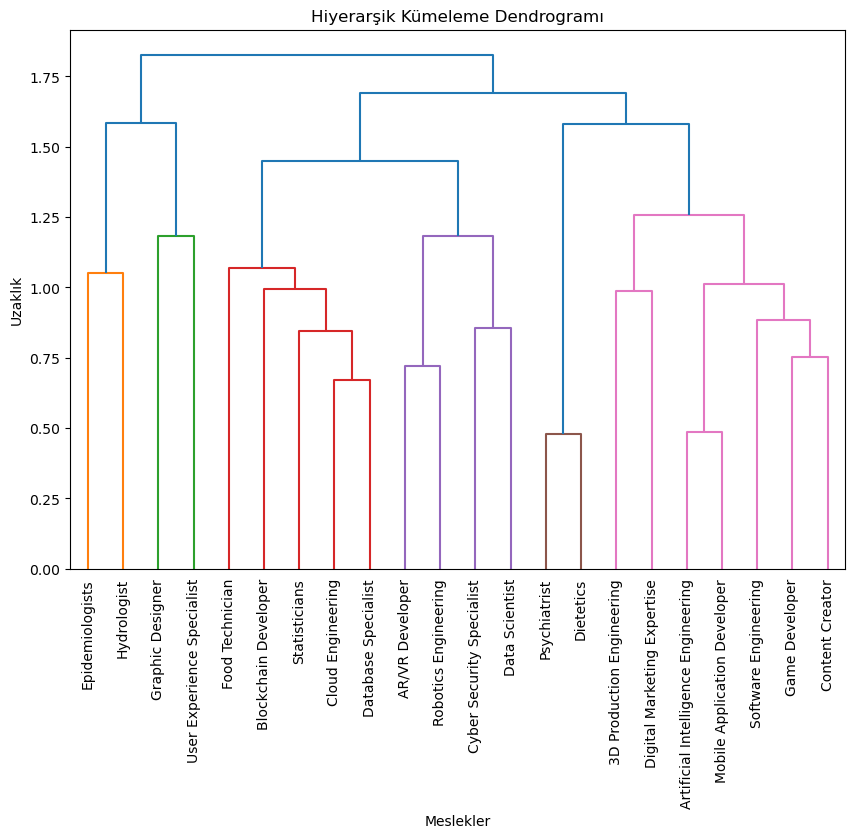

In [17]:
# figsize kullanıyoruz
plt.figure(figsize=(10, 7))
# leaf_rotation ile yetkinlikleri 90 derecelik açı ile yazıyoruz.
dendrogram(linkage_matrix, labels=data['Meslek'].values, leaf_rotation=90)
plt.title('Hiyerarşik Kümeleme Dendrogramı') #önce title'ı yaz
plt.xlabel('Meslekler')
plt.ylabel('Uzaklık')
plt.show()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Veri setini DataFrame'e dönüştürme
veriSeti = pd.read_csv('veriSeti.csv')

# Sadece 'Meslek' ve 'Yetkinlik' sütunlarını seçme
data = veriSeti[['Meslek', 'Yetkinlik']]

# Yetkinlikleri vektörlere dönüştürme
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(data['Yetkinlik'].values.astype('U'))

# K-means kümeleme işlemi
k = 5 # Toplam küme sayısı
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(X)

# Her bir veri noktası için tahmin edilen küme etiketlerini alıyoruz
labels = kmeans.labels_

# Her bir grup için meslekleri ve ortak yetkinlikleri gösterme
for cluster in range(k):
    cluster_labels = data['Meslek'][labels == cluster]
    cluster_skills = set([skill for skills in data['Yetkinlik'][labels == cluster] for skill in skills.split(', ')])
    print(f"Grup {cluster+1}: {', '.join(cluster_labels)}")
    print()
    print(f"Ortak Yetkinlikler: {', '.join(cluster_skills)}")
    print()



Grup 1: AR/VR Developer, Content Creator, Robotics Engineering, Graphic Designer, User Experience Specialist

Ortak Yetkinlikler: Empati, Problem Çözme, Analitik Düşünme, Ekip Çalışması, İnovasyon, Tasarım Becerisi, İletişim Becerisi, Zaman Yönetimi, Yaratıcılık, Öğrenmeye Açıklık, Analiz, Yaratıcı Düşünme, Programlama

Grup 2: Artificial Intelligence Engineering, 3D Production Engineering, Mobile Application Developer, Game Developer, Software Engineering, Digital Marketing Expertise

Ortak Yetkinlikler: Problem Çözme, Müşteri Odaklılık, Analitik Düşünme, Çizim Yeteneği, Ekip Çalışması, Tasarım Becerisi, İletişim Becerisi, Yaratıcılık, Öğrenmeye Açıklık, Analiz, Raporlama, Proje Yönetimi, Satış Becerisi, Programlama

Grup 3: Epidemiologists, Hydrologist

Ortak Yetkinlikler: Analitik Düşünme, İnovasyon, Analiz, Araştırma Becerisi, Öğrenmeye Açıklık, Raporlama, Veri Toplama ve Kullanma

Grup 4: Psychiatrist, Dietetics

Ortak Yetkinlikler: Problem Çözme, Analitik Düşünme, Ekip Çalışması,

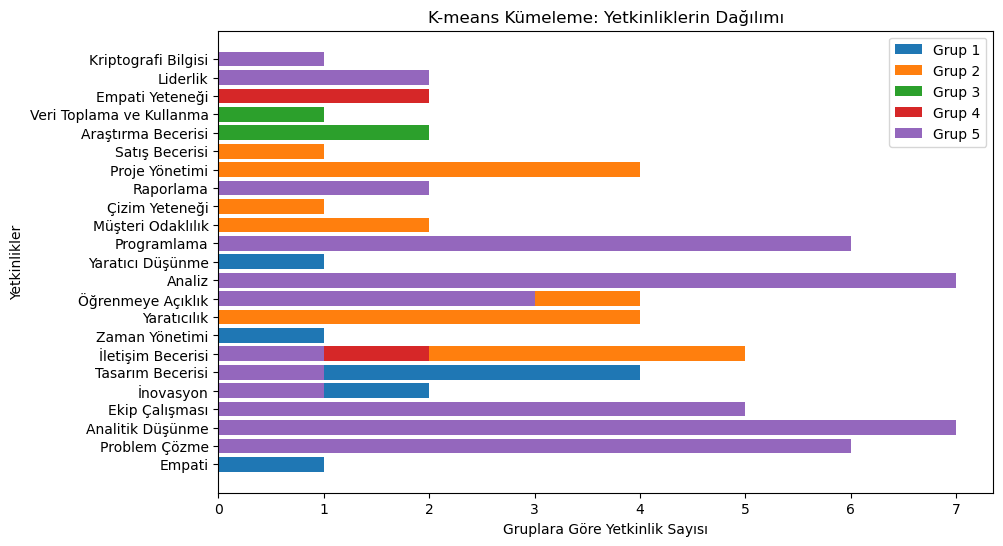

In [19]:
# Küme yetkinliklerini toplama
kume_yetkinlikler = []
for i in range(k):
    cluster_data = data[labels == i]
    yetkinlikler = cluster_data['Yetkinlik'].str.split(', ').tolist()
    yetkinlikler = [item for sublist in yetkinlikler for item in sublist]  # Liste içindeki alt listeleri birleştirme
    kume_yetkinlikler.append(yetkinlikler)

# Görselleştirme
plt.figure(figsize=(10, 6))
for i in range(k):
    yetkinlikler = list(set(kume_yetkinlikler[i]))  # Her bir kümenin benzersiz yetkinliklerini almak
    sayilar = [kume_yetkinlikler[i].count(yetkinlik) for yetkinlik in yetkinlikler]  # Her yetkinliğin sayısını hesaplama
    plt.barh(yetkinlikler, sayilar, label=f'Grup {i+1}')

plt.xlabel('Gruplara Göre Yetkinlik Sayısı')
plt.ylabel('Yetkinlikler')
plt.title('K-means Kümeleme: Yetkinliklerin Dağılımı')
plt.legend()
plt.show()


# Veri Analizi - Meslekler ve Minimum Beklenilen Deneyim(YIL) 

In [20]:
import pandas as pd

# Veri setini tanımlama
veriSeti = pd.read_csv('veriSeti.csv')

# Sadece "Deneyim" ve "Meslek" sütunlarını seçme
deneyim_verisi = veriSeti[['Meslek', 'Minimum Beklenilen Deneyim(YIL)']]

# Sonucu tablo olarak görüntüleme
display(deneyim_verisi)


,Meslek,Minimum Beklenilen Deneyim(YIL)
0,Artificial Intelligence Engineering,0
1,3D Production Engineering,0
2,Mobile Application Developer,2
3,Game Developer,2
4,Blockchain Developer,2
5,Software Engineering,2
6,AR/VR Developer,0
7,Cyber Security Specialist,0
8,Content Creator,0
9,Psychiatrist,0


In [21]:
# Deneyim yıllarına göre küçükten büyüğe sıralama (sort_values kullanarak)
deneyim_verisi = deneyim_verisi.sort_values(by='Minimum Beklenilen Deneyim(YIL)')

# Sonucu tablo olarak görüntüleme
display(deneyim_verisi)

,Meslek,Minimum Beklenilen Deneyim(YIL)
0,Artificial Intelligence Engineering,0
1,3D Production Engineering,0
6,AR/VR Developer,0
7,Cyber Security Specialist,0
8,Content Creator,0
9,Psychiatrist,0
19,Food Technician,2
18,Graphic Designer,2
16,Epidemiologists,2
13,Cloud Engineering,2


# Görselleştirme - Grafikler

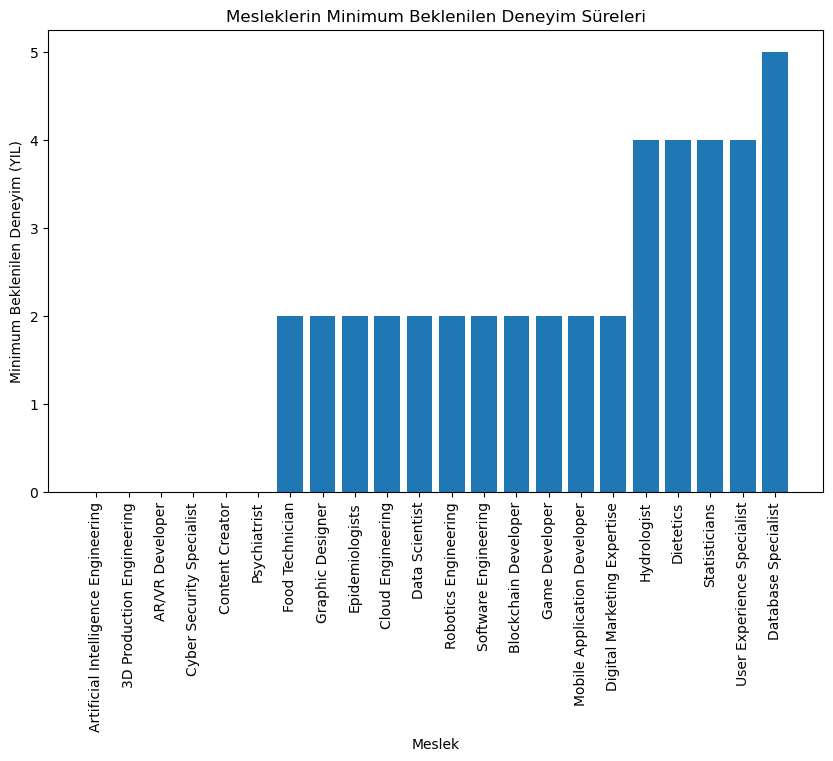

In [22]:
# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(deneyim_verisi['Meslek'], deneyim_verisi['Minimum Beklenilen Deneyim(YIL)'])
plt.xlabel('Meslek')
plt.ylabel('Minimum Beklenilen Deneyim (YIL)')
plt.title('Mesleklerin Minimum Beklenilen Deneyim Süreleri')
plt.xticks(rotation=90)
plt.show()


# Algoritma Seçimi

In [23]:
import pandas as pd

# Veri setini tanımlama
veriSeti = pd.read_csv('veriSeti.csv')

# Sadece "Deneyim" ve "Meslek" sütunlarını seçme
deneyim_meslek = veriSeti[['Minimum Beklenilen Deneyim(YIL)', 'Meslek']]

# Ortak deneyim süresi isteyen meslekleri gruplama
gruplu_meslekler = deneyim_meslek.groupby('Minimum Beklenilen Deneyim(YIL)')['Meslek'].apply(list).reset_index(name='Meslekler')

# Sonuçları yazdırma
for index, row in gruplu_meslekler.iterrows():
    deneyim_suresi = row['Minimum Beklenilen Deneyim(YIL)']
    meslekler = ', '.join(row['Meslekler'])
    print(f"Deneyim Süresi: {deneyim_suresi}")
    print(f"Meslekler: {meslekler}")
    print()


Deneyim Süresi: 0
Meslekler: Artificial Intelligence Engineering, 3D Production Engineering, AR/VR Developer, Cyber Security Specialist, Content Creator, Psychiatrist

Deneyim Süresi: 2
Meslekler: Mobile Application Developer, Game Developer, Blockchain Developer, Software Engineering, Robotics Engineering, Digital Marketing Expertise, Data Scientist, Cloud Engineering, Epidemiologists, Graphic Designer, Food Technician

Deneyim Süresi: 4
Meslekler: Dietetics, Statisticians, Hydrologist, User Experience Specialist

Deneyim Süresi: 5
Meslekler: Database Specialist



In [24]:
# K-means kümeleme işlemi
k = 4  # Toplam küme sayısı
kmeans = KMeans(n_clusters=k)
kmeans.fit(veriSeti[['Minimum Beklenilen Deneyim(YIL)']])

# Her bir veri noktası için tahmin edilen küme etiketlerini alıyoruz
labels = kmeans.labels_

# Her bir grup için deneyim sürelerini ve meslekleri gösterme
for cluster in range(k):
    cluster_labels = veriSeti['Meslek'][labels == cluster]
    cluster_experiences = veriSeti['Minimum Beklenilen Deneyim(YIL)'][labels == cluster]
    print(f"Grup {cluster+1}:")
    for i in range(len(cluster_labels)):
        print(f"Mesleğin Adı: {cluster_labels.iloc[i]}, Deneyim Süresi: {cluster_experiences.iloc[i]} yıl")
    print()


Grup 1:
Mesleğin Adı: Dietetics, Deneyim Süresi: 4 yıl
Mesleğin Adı: Statisticians, Deneyim Süresi: 4 yıl
Mesleğin Adı: Hydrologist, Deneyim Süresi: 4 yıl
Mesleğin Adı: User Experience Specialist, Deneyim Süresi: 4 yıl

Grup 2:
Mesleğin Adı: Mobile Application Developer, Deneyim Süresi: 2 yıl
Mesleğin Adı: Game Developer, Deneyim Süresi: 2 yıl
Mesleğin Adı: Blockchain Developer, Deneyim Süresi: 2 yıl
Mesleğin Adı: Software Engineering, Deneyim Süresi: 2 yıl
Mesleğin Adı: Robotics Engineering, Deneyim Süresi: 2 yıl
Mesleğin Adı: Digital Marketing Expertise, Deneyim Süresi: 2 yıl
Mesleğin Adı: Data Scientist, Deneyim Süresi: 2 yıl
Mesleğin Adı: Cloud Engineering, Deneyim Süresi: 2 yıl
Mesleğin Adı: Epidemiologists, Deneyim Süresi: 2 yıl
Mesleğin Adı: Graphic Designer, Deneyim Süresi: 2 yıl
Mesleğin Adı: Food Technician, Deneyim Süresi: 2 yıl

Grup 3:
Mesleğin Adı: Artificial Intelligence Engineering, Deneyim Süresi: 0 yıl
Mesleğin Adı: 3D Production Engineering, Deneyim Süresi: 0 yıl
Mes

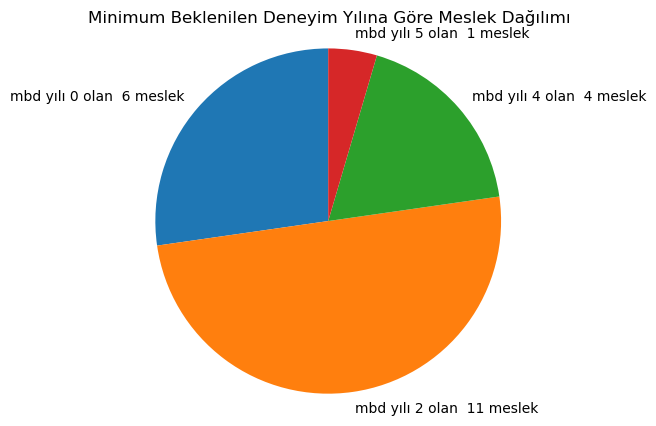

In [25]:
# mbd= Minimum Beklenilen Deneyim!

# Gruplara göre meslek sayısını hesaplama
group_counts = deneyim_verisi['Minimum Beklenilen Deneyim(YIL)'].value_counts().sort_index()

# Pasta grafiği oluşturma
plt.figure(figsize=(5, 5))
plt.pie(group_counts, labels=[f"mbd yılı {i} olan  {len(deneyim_verisi[deneyim_verisi['Minimum Beklenilen Deneyim(YIL)'] == i])} meslek" for i in group_counts.index], startangle=90)

plt.axis('equal')
plt.title('Minimum Beklenilen Deneyim Yılına Göre Meslek Dağılımı')
plt.show()